Author: Rodrigo MM Santiago @rodrigommsantiago

In [1]:
# Modules...
import numpy as np              # Numeric functions
import matplotlib.pyplot as plt # Plotting

%matplotlib inline 

Oscillatory power at a given frequency:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


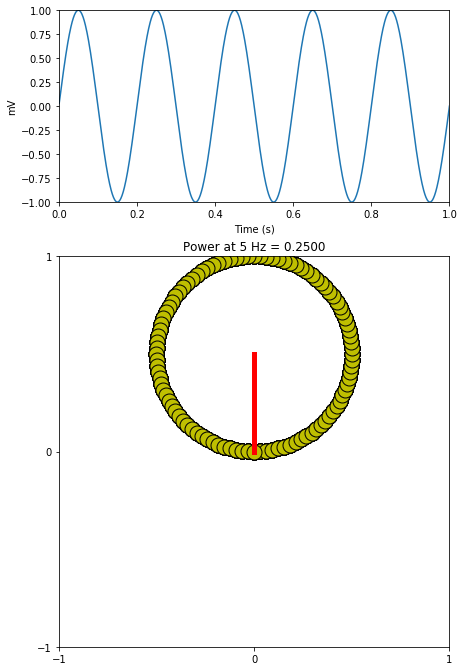

In [2]:
srate = 1000. # sampling rate [Hz]
dt = 1./srate # sampling interval [s]
Tmax = 1.001  # signal lenght [s]
f = 5.        # signal frequency [Hz]

t = np.arange(dt,Tmax,dt) # time vector
X = np.sin(2*np.pi*f*t)   # signal

plt.figure(figsize=(7,12))

ax1 = plt.subplot2grid((3, 1), (0, 0))
ax1.set_xlim([0,Tmax])
ax1.set_ylim([-1,1])
ax1.plot(t,X)
ax1.set_xlim([0,1])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('mV');

ax2 = plt.subplot2grid((3, 1), (1, 0),rowspan=2)
ax2.axis('square')
ff = 5                      # kernel frequency
K = np.exp(1j*2*np.pi*ff*t) # Fourier kernel
ax2.plot(np.real(X*K),np.imag(X*K),'k',marker='o',
         markerfacecolor='y',markersize=15)
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.set_xticks([-1,0,1])
ax2.set_yticks([-1,0,1])

Fx = np.mean(X*K) # Fourier transform
ax2.plot([0,np.real(Fx)],[0,np.imag(Fx)],'r-',linewidth=5)

Power = Fx*np.conj(Fx)
ax2.set_title('Power at '+str(ff)+' Hz = '+"%.4f" % Power);



```
# This is formatted as code
```

Power spectrum:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


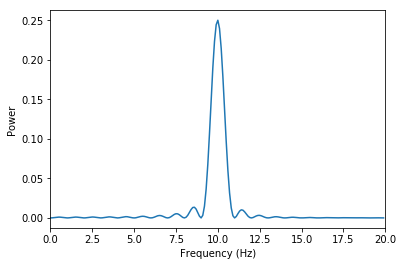

In [3]:
srate = 1000.              # sampling rate [Hz]
dt = 1./srate              # sampling interval [s]
f = 10.                    # signal frequency [Hz]
Tmax = 1.                  # signal length
t = np.arange(dt,Tmax,dt)  # time vector

X = np.sin(2*np.pi*f*t) # signal

freq = np.arange(0,20,0.1)    # analyzed frequencies
PSD = np.empty(len(freq)) # stores the power of each analyzed frequency

for count,ff in enumerate(freq):
    K = np.exp(1j*2*np.pi*ff*t)
    Fx = np.sum(X*K)*dt
    PSD[count] = Fx*np.conjugate(Fx)/Tmax
        
plt.plot(freq,PSD)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([0,20]);

Hamming and Hanning windows:

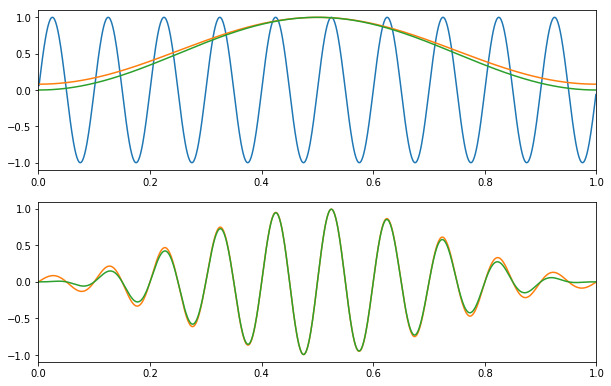

In [4]:
W_Ham = np.hamming(len(X))
W_Han = np.hanning(len(X))

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(t,X)
plt.plot(t,np.hamming(len(X)))
plt.plot(t,np.hanning(len(X)))
plt.xlim([0,1])

plt.subplot(312)
plt.plot(t,X*W_Ham,'C1')
plt.plot(t,X*W_Han,'C2')
plt.xlim([0,1]);

PSD using windows:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


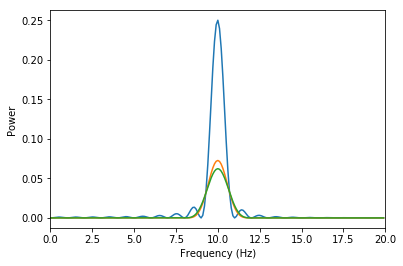

In [5]:
PSD     = np.empty(len(freq))
PSD_Ham = np.empty(len(freq))
PSD_Han = np.empty(len(freq))

for count,ff in enumerate(freq):
    K = np.exp(1j*2*np.pi*ff*t)
    Fx     = np.sum(X*K)*dt
    Fx_Ham = np.sum(X*K*W_Ham)*dt
    Fx_Han = np.sum(X*K*W_Han)*dt
    PSD[count]     = Fx*np.conjugate(Fx)/Tmax
    PSD_Ham[count] = Fx_Ham*np.conjugate(Fx_Ham)/Tmax
    PSD_Han[count] = Fx_Han*np.conjugate(Fx_Han)/Tmax
        
plt.plot(freq,PSD)
plt.plot(freq,PSD_Ham)
plt.plot(freq,PSD_Han)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([0,20]);

PSD using the scipy.signal.welch function

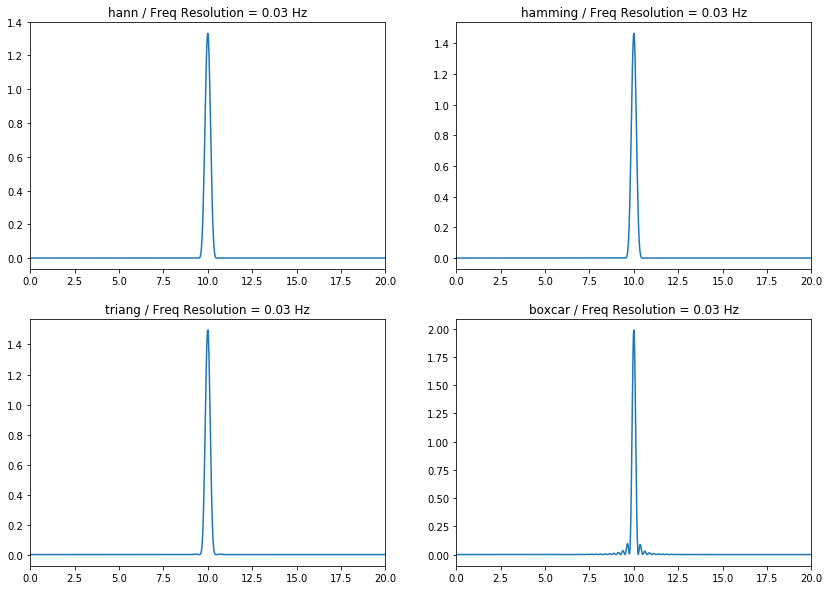

In [6]:
from scipy.signal import welch # imports welch function

Tmax = 30.
t = np.arange(dt,Tmax,dt) # time vector
X = np.sin(2*np.pi*f*t)   # signal

windowlen = 4.*srate   # window size
overlap = windowlen/2. # overlapping %
nfft = 2.**15          # number of FFTs
dF = srate/nfft        # frequency resolution
windows = ['hann','hamming','triang','boxcar']

plt.figure(figsize=(14,10))
for i,win in enumerate(windows):
    F, PSD = welch(X,fs=srate,window=win,nperseg=windowlen,
                   noverlap=overlap,nfft=nfft)
    plt.subplot(220+i+1)
    plt.plot(F,PSD)
    plt.xlim([0,20])
    plt.title(windows[i]+' / Freq Resolution = '+'%.2f' %dF +' Hz')